# AR 모델을 이용하여 시계열 데이터를 생성하는 과정

In [1]:
import numpy as np  
import pandas as pd

In [4]:
n = 100  #데이터 포인트 수
ar_params = [0,7]  #자기회귀 계수
ms_params = []  #이동평균 계수
residuals = np.random.normal(0,1, n)  #전차 생성

# AR(1) 모델 생성
data = [0]  # 초기값 설정
for i in range (1, n) :
    data.append(ar_params[0] * data[i-1] + residuals[i])

#데이터 프레임 생성
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Value' : data
})

print(df)

         Date     Value
0  2023-01-01  0.000000
1  2023-01-02  0.140229
2  2023-01-03 -0.364017
3  2023-01-04 -0.251961
4  2023-01-05 -0.869319
..        ...       ...
95 2023-04-06 -1.179834
96 2023-04-07  0.684566
97 2023-04-08  1.512963
98 2023-04-09  1.021424
99 2023-04-10 -0.882423

[100 rows x 2 columns]


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# AR 모델링 실습

In [6]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -137.501
Method:               Conditional MLE   S.D. of innovations              0.970
Date:                Wed, 31 May 2023   AIC                            281.001
Time:                        17:18:13   BIC                            288.786
Sample:                             1   HQIC                           284.151
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0415      0.098      0.425      0.671      -0.150       0.233
Value.L1       0.0665      0.101      0.660      0.509      -0.131       0.264
                                    Roots           

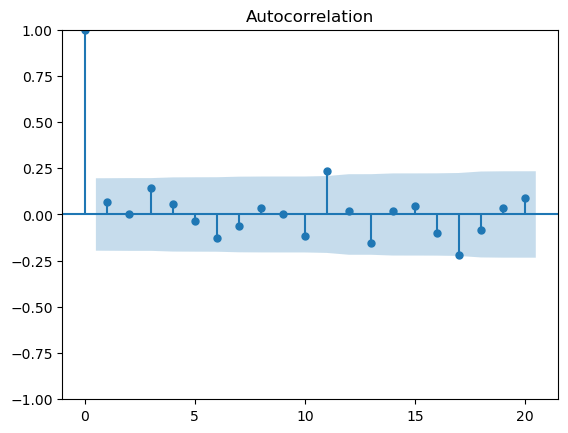

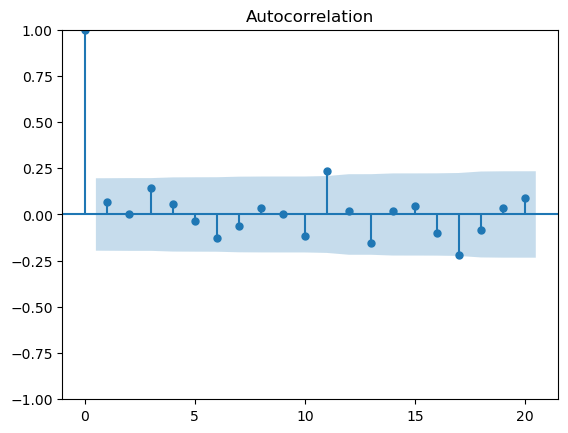

In [8]:
# AR (1) 모델 적합
model = AutoReg(df['Value'], lags=1)
results = model.fit()

#모델 정보 출력
print(results.summary())

# ACF 그래프 출력
plot_acf(df['Value'], lags=20)